### Fixes

* performance (`DetectionResults.detections_by_class` memoized)
* performance (`DetectionResults.num_gt_class` memoized)
* "crowd" GT detection handling (OK for T_IoU = 0.5 at least!)

### To do

* "crowd" GT detection handling
* per-class mAP
* per-class AP
* small / medium / large AP...

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from evaldets.api import *
from uo.utils import *

In [2]:
dr = DetectionResults('../reval_05/baseline_05/evaluator_dump_R101_101/', area_rng=None, iou_thresh=None, debug=1, cache=0)

loading annotations into memory...
Done (t=0.47s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.97s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=37.30s).


In [30]:
dr.mean_average_precision()

0.6025011979805461

In [4]:
dr.finish_cocoeval()

Accumulating evaluation results...
DONE (t=7.52s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.404
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.603
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.432
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.443
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.522
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.336
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.532
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.376
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.599
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100

In [31]:
dr.mean_average_precision(0.75)

0.4268057493526962

In [6]:
# np.mean([dr.mean_average_precision(t) for t in dr.IOU_THRS])

In [7]:
# np.mean([dr.average_precision('person', t) for t in dr.IOU_THRS])

In [8]:
# TxRxKxAxM
np.shape(dr.coco.eval["precision"][0, :, 0, 0, -1])

(101,)

In [9]:
q1 = dr.pr_curve('person')
q1

array([1.        , 0.99877601, 0.99877601, 0.99877601, 0.99877601,
       0.99877601, 0.99877601, 0.99877601, 0.99852725, 0.99852725,
       0.99852725, 0.99852725, 0.99852725, 0.9972752 , 0.99696233,
       0.99696233, 0.9967231 , 0.9962039 , 0.99539171, 0.99471662,
       0.99404216, 0.99302224, 0.99209798, 0.99209798, 0.99099775,
       0.99082569, 0.98916841, 0.98880597, 0.98828506, 0.98752728,
       0.98720682, 0.98719814, 0.98695035, 0.98668885, 0.98603277,
       0.98517941, 0.9847793 , 0.98350315, 0.98278747, 0.98167479,
       0.98024074, 0.97831379, 0.97620579, 0.9752205 , 0.97334427,
       0.97178307, 0.96969104, 0.96683187, 0.96440552, 0.96192203,
       0.95975783, 0.95583377, 0.95357143, 0.95153231, 0.94650407,
       0.94245748, 0.94063714, 0.93617669, 0.93288591, 0.93027335,
       0.92584109, 0.92138453, 0.91674667, 0.91081009, 0.90528663,
       0.89680307, 0.88968105, 0.88265493, 0.87418008, 0.8654719 ,
       0.85741877, 0.84610282, 0.83415735, 0.81779441, 0.80334

In [10]:
q2 = dr.pr_curve2('person')
q2

array([1.        , 0.99877601, 0.99877601, 0.99877601, 0.99877601,
       0.99877601, 0.99877601, 0.99877601, 0.99852725, 0.99852725,
       0.99852725, 0.99852725, 0.99852725, 0.9972752 , 0.99696233,
       0.99696233, 0.9967231 , 0.9962039 , 0.99539171, 0.99471662,
       0.99404216, 0.99302224, 0.99209798, 0.99209798, 0.99099775,
       0.99082569, 0.98916841, 0.98880597, 0.98828506, 0.98752728,
       0.98720682, 0.98719814, 0.98695035, 0.98668885, 0.98603277,
       0.98517941, 0.9847793 , 0.98350315, 0.98278747, 0.98167479,
       0.98024074, 0.97831379, 0.97620579, 0.9752205 , 0.97334427,
       0.97178307, 0.96969104, 0.96683187, 0.96440552, 0.96192203,
       0.95975783, 0.95583377, 0.95357143, 0.95153231, 0.94650407,
       0.94245748, 0.94063714, 0.93617669, 0.93288591, 0.93027335,
       0.92584109, 0.92138453, 0.91674667, 0.91081009, 0.90528663,
       0.89680307, 0.88968105, 0.88265493, 0.87418008, 0.8654719 ,
       0.85741877, 0.84610282, 0.83415735, 0.81779441, 0.80334

In [11]:
cq = dr.coco.eval["precision"][0, :, 0, 0, -1]
cq

array([1.        , 0.99877601, 0.99877601, 0.99877601, 0.99877601,
       0.99877601, 0.99877601, 0.99877601, 0.99852725, 0.99852725,
       0.99852725, 0.99852725, 0.99852725, 0.9972752 , 0.99696233,
       0.99696233, 0.9967231 , 0.9962039 , 0.99539171, 0.99471662,
       0.99404216, 0.99302224, 0.99209798, 0.99209798, 0.99099775,
       0.99082569, 0.98916841, 0.98880597, 0.98828506, 0.98752728,
       0.98720682, 0.98719814, 0.98695035, 0.98668885, 0.98603277,
       0.98517941, 0.9847793 , 0.98350315, 0.98278747, 0.98167479,
       0.98024074, 0.97831379, 0.97620579, 0.9752205 , 0.97334427,
       0.97178307, 0.96969104, 0.96683187, 0.96440552, 0.96192203,
       0.95975783, 0.95583377, 0.95357143, 0.95153231, 0.94650407,
       0.94245748, 0.94063714, 0.93617669, 0.93288591, 0.93027335,
       0.92584109, 0.92138453, 0.91674667, 0.91081009, 0.90528663,
       0.89680307, 0.88968105, 0.88265493, 0.87418008, 0.8654719 ,
       0.85741877, 0.84610282, 0.83415735, 0.81779441, 0.80334

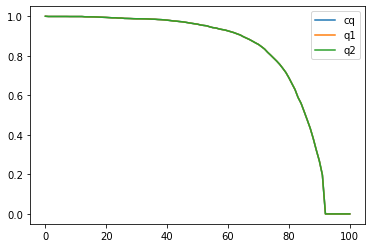

In [12]:
plt.plot(cq[:], label="cq")
plt.plot(q1[:], label='q1')
plt.plot(q2[:], label='q2')
plt.legend()

In [13]:
np.mean(dr.coco.eval["precision"][0, :, 0, 0, -1])

0.8071831344949841

In [32]:
dr.average_precision('person')

0.8071831344949841

In [14]:
# {dr.names.get(i+1): np.mean(dr.coco.eval["precision"][:, :, i, 0, -1])*100 for i in range(10)}

In [15]:
# load('../reval_05/baseline_05/evaluator_dump_R101_101/results.json.gz')

In [16]:
dr.coco.eval.keys()

dict_keys(['params', 'counts', 'date', 'precision', 'recall', 'scores', 'npigs', 'tp_sums', 'fp_sums', 'dtigs'])

In [17]:
dr.num_gt_class('person')

10777

In [18]:
dr.coco.eval['tp_sums'][0].shape

(10, 72083)

In [19]:
len(dr.detections_by_class('person'))

63997

In [20]:
len(dr.all_detections_by_class('person'))

72083

In [21]:
dets = dr.all_detections_by_class('person')

In [22]:
CROWD_ID_T = 10 ** 9
TP = np.cumsum([(det.get("iou", 0) >= 0.5 and det.get('gt_id', 0) < CROWD_ID_T) for det in dets]).astype(float)
TP.shape

(72083,)

In [23]:
(TP == dr.coco.eval['tp_sums'][0][0]).all()

True

In [24]:
FP = np.cumsum([(det.get("iou", 0) < 0.5 and det.get('gt_id', 0) < CROWD_ID_T) for det in dets]).astype(float)

Here's the problem:

In [25]:
(FP == dr.coco.eval['fp_sums'][0][0]).all()

True

In [26]:
FP

array([    0.,     0.,     0., ..., 54150., 54151., 54152.])

In [27]:
FP_coco = dr.coco.eval['fp_sums'][0][0]
FP_coco

array([    0.,     0.,     0., ..., 54150., 54151., 54152.])

In [28]:
for i, d in enumerate(dets):
    if FP[i] != FP_coco[i]:
        break
i, FP[i], FP_coco[i], d

(72082,
 54152.0,
 54152.0,
 {'image_id': 270474,
  'score': 0.050001293420791626,
  'category': 'person',
  'x': 449.40924072265625,
  'y': 2.111234664916992,
  'w': 50.59075927734375,
  'h': 241.18011474609375})

In [29]:
dr.coco.eval['dtigs'][0][0][i]

False